In [1]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

#importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"C:\Users\abhig\Desktop\customer_data.csv")
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [3]:
df.drop('customer_id', axis='columns', inplace=True)
df.dtypes

year                        int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [4]:
df.drop('year', axis='columns', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   phone_no                2000 non-null   object 
 1   gender                  1976 non-null   object 
 2   age                     2000 non-null   int64  
 3   no_of_days_subscribed   2000 non-null   int64  
 4   multi_screen            2000 non-null   object 
 5   mail_subscribed         2000 non-null   object 
 6   weekly_mins_watched     2000 non-null   float64
 7   minimum_daily_mins      2000 non-null   float64
 8   maximum_daily_mins      2000 non-null   float64
 9   weekly_max_night_mins   2000 non-null   int64  
 10  videos_watched          2000 non-null   int64  
 11  maximum_days_inactive   1972 non-null   float64
 12  customer_support_calls  2000 non-null   int64  
 13  churn                   1965 non-null   float64
dtypes: float64(5), int64(5), object(4)
memor

From the above, we can see that the dataset has 2000 rows and 15 columns

In [6]:
#printing out a list of all the columns in our training dataset
df.columns

Index(['phone_no', 'gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'maximum_days_inactive', 'customer_support_calls', 'churn'],
      dtype='object')

Types of features :

1) Categorical : gender, multi_screen, mail_subscribed, churn
2) Continuous : age, no_of_days_subscribed, weekly_mins_watched, minimum_daily_mins, maximum_daily_mins, weekly_max_night_mins, videos_watched, maximum_days_inactive, customer_support_calls
3) Alphanumeric: phone_no

In [7]:
df.drop('phone_no', axis='columns', inplace=True)

In [8]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [9]:
#Now that we know what kind of features we are going to work with, let's take a look what information they provide us:
df.describe()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [10]:
df.describe(include='O')

,gender,multi_screen,mail_subscribed
count,1976,2000,2000
unique,2,2,2
top,Male,no,no
freq,1053,1802,1430


On looking at categorical features, we find that:

1) The gender column has two values in which male is the most common
2) The multi_screen and mail_subscribed column has two values in which no is the most common.

In [11]:
#The percentage of missing/null values in dataset
df.isnull().sum()/ len(df) *100

gender                    1.20
age                       0.00
no_of_days_subscribed     0.00
multi_screen              0.00
mail_subscribed           0.00
weekly_mins_watched       0.00
minimum_daily_mins        0.00
maximum_daily_mins        0.00
weekly_max_night_mins     0.00
videos_watched            0.00
maximum_days_inactive     1.40
customer_support_calls    0.00
churn                     1.75
dtype: float64

Time to visualize the dataset to draw some inferences from it

Male      1053
Female     923
Name: gender, dtype: int64

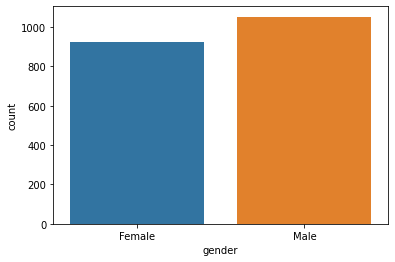

In [12]:
sns.countplot('gender',data=df)
df['gender'].value_counts()

The no. of male subscribers are more than the female subscribers

,gender,churn
0,Female,0.138614
1,Male,0.129845


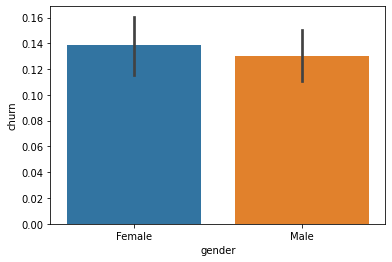

In [13]:
#Comparing the gender feature against the churn feature
sns.barplot(x='gender',y='churn',data=df)
df.groupby('gender',as_index=False).churn.mean()

The number of females who renewed subscription were greater than the males

,multi_screen,churn
1,yes,0.397959
0,no,0.104014


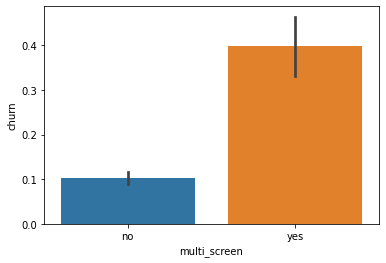

In [14]:
#Comparing the multi_screen against churn
sns.barplot(x='multi_screen',y='churn',data=df)
df[["multi_screen", "churn"]].groupby(['multi_screen'], as_index=False).mean().sort_values(by='churn', ascending=False)

Having Multi-screen had a higher rate of renewal of subscription

,mail_subscribed,churn
0,no,0.150285
1,yes,0.090909


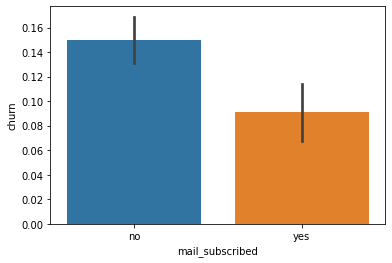

In [15]:
#Comparing the mail_subscribed against churn
sns.barplot(x='mail_subscribed',y='churn',data=df)
df[["mail_subscribed", "churn"]].groupby(['mail_subscribed'], as_index=False).mean().sort_values(by='churn', ascending=False)

Customers who did not subscribe to the mail have a higher rate of renewal of subscription

,customer_support_calls,churn
9,9,1.000000
5,5,0.657895
6,6,0.636364
8,8,0.500000
4,4,0.430000
7,7,0.400000
0,0,0.111650
2,2,0.108235
1,1,0.102493
3,3,0.068273


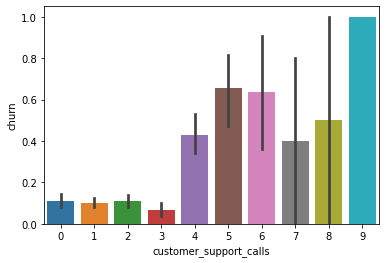

In [16]:
sns.barplot(x='customer_support_calls',y='churn',data=df)
df[["customer_support_calls","churn"]].groupby(['customer_support_calls'], as_index=False).mean().sort_values(by='churn', ascending=False)

Customers who either made 4,5,6,9 customer support calls have higher rate of renewal of subscription

,customer_support_calls,churn
9,9,1.000000
5,5,0.657895
6,6,0.636364
8,8,0.500000
4,4,0.430000
7,7,0.400000
0,0,0.111650
2,2,0.108235
1,1,0.102493
3,3,0.068273


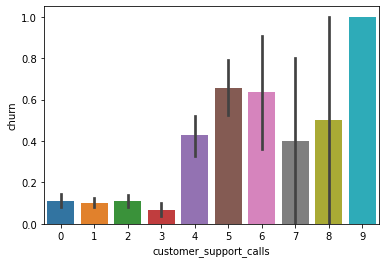

In [17]:
sns.barplot(x='customer_support_calls',y='churn',data=df)
df[["customer_support_calls","churn"]].groupby(['customer_support_calls'], as_index=False).mean().sort_values(by='churn', ascending=False)

,videos_watched,churn
15,15,0.500000
2,2,0.185315
1,1,0.181818
11,11,0.166667
10,10,0.156250
9,9,0.150000
7,7,0.140625
6,6,0.121212
3,3,0.119107
4,4,0.117479


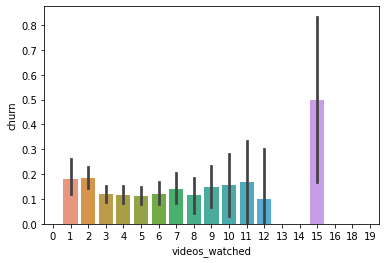

In [18]:
sns.barplot(x='videos_watched',y='churn',data=df)
df[["videos_watched","churn"]].groupby(['videos_watched'], as_index=False).mean().sort_values(by='churn', ascending=False)

Customers who watched 15 videos have higher rate of renewal of subscription

In [19]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


,maximum_days_inactive,churn
6,6.0,0.500000
4,4.0,0.146688
5,5.0,0.146341
3,3.0,0.127820
2,2.0,0.107807
1,1.0,0.083333
0,0.0,0.000000


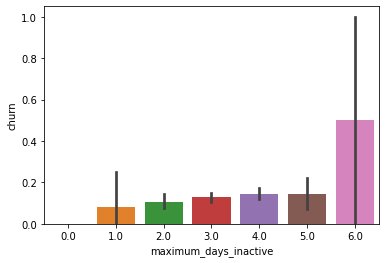

In [20]:
sns.barplot(x='maximum_days_inactive',y='churn',data=df)
df[["maximum_days_inactive","churn"]].groupby(['maximum_days_inactive'], as_index=False).mean().sort_values(by='churn', ascending=False)

Customers who had 6 days inactive have higher rate of renewal of subscription

In [21]:
df.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

Now, let's fill in the missing values for gender column in the dataset. 
Most people who renew there subscription are females. Hence, we will be filling the missing values with "Female"

In [22]:
#filling the missing Embarked values in train and test datasets
df.gender.fillna('Female',inplace=True)

In [23]:
df.isnull().sum()

gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

We will replace the NaN values in the maximum_days_inactive column with the median value of the column

In [24]:
print("The Median is :", int(df.maximum_days_inactive.median()))

The Median is : 3


In [25]:
#filling the missing values in the Age column
df.maximum_days_inactive.fillna(3, inplace=True)

We will replace the NaN values in the churn column with the median value of the column

In [26]:
print("The Median is :", int(df.churn.median()))

The Median is : 0


In [27]:
#filling the missing values in the Age column
df.churn.fillna(0, inplace=True)

In [28]:
df.isnull().sum()

gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

Now we are completely free of all NA values.

In [29]:
#Converting categorical variables into numerical ones
df2 = pd.get_dummies(df,columns=['gender','multi_screen','mail_subscribed'],drop_first=True)
df2.head()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_Male,multi_screen_yes,mail_subscribed_yes
0,36,62,148.35,12.2,16.81,82,1,4.0,1,0.0,0,0,0
1,39,149,294.45,7.7,33.37,87,3,3.0,2,0.0,0,0,0
2,65,126,87.30,11.9,9.89,91,1,4.0,5,1.0,0,0,0
3,24,131,321.30,9.5,36.41,102,4,3.0,3,0.0,0,0,1
4,40,191,243.00,10.9,27.54,83,7,3.0,1,0.0,0,0,0


Let's have a final look at our improved dataset

In [30]:
df2.head()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_Male,multi_screen_yes,mail_subscribed_yes
0,36,62,148.35,12.2,16.81,82,1,4.0,1,0.0,0,0,0
1,39,149,294.45,7.7,33.37,87,3,3.0,2,0.0,0,0,0
2,65,126,87.30,11.9,9.89,91,1,4.0,5,1.0,0,0,0
3,24,131,321.30,9.5,36.41,102,4,3.0,3,0.0,0,0,1
4,40,191,243.00,10.9,27.54,83,7,3.0,1,0.0,0,0,0


In [31]:
#Splitting out training data into X: features and Y: target
X = df2.drop("churn",axis=1) 
Y = df2["churn"]

#splitting our training data again in train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

In [32]:
X_train

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,gender_Male,multi_screen_yes,mail_subscribed_yes
836,54,130,310.65,12.4,35.21,100,2,4.0,1,0,0,0
575,22,106,405.45,14.4,45.95,133,7,4.0,1,0,1,1
557,33,137,261.60,10.2,29.65,121,5,3.0,0,1,0,0
1235,32,77,284.25,9.2,32.22,91,7,3.0,0,1,0,0
1360,39,132,263.55,8.6,29.87,118,3,3.0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,32,110,243.00,8.9,27.54,99,8,3.0,0,0,0,0
1294,38,79,333.45,8.9,37.79,82,4,3.0,3,1,0,0
860,44,97,252.60,8.5,28.63,95,7,3.0,0,1,0,1
1459,49,129,252.60,11.8,28.63,100,7,4.0,1,0,0,0


In [33]:
Y_train

836     0.0
575     1.0
557     0.0
1235    0.0
1360    0.0
       ... 
1130    0.0
1294    0.0
860     0.0
1459    0.0
1126    1.0
Name: churn, Length: 1400, dtype: float64

In [34]:
X_test

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,gender_Male,multi_screen_yes,mail_subscribed_yes
1860,33,23,169.65,6.9,19.23,126,2,3.0,1,0,0,0
353,27,50,321.45,10.6,36.43,130,4,3.0,1,1,0,1
1333,45,108,281.10,12.6,31.86,107,8,4.0,1,0,0,0
905,43,155,325.05,10.8,36.84,106,1,3.0,2,0,0,0
1289,41,146,231.00,8.2,26.18,107,4,3.0,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
148,30,100,323.85,11.6,36.70,157,4,4.0,1,1,0,1
1554,38,54,410.70,11.7,46.55,117,3,4.0,1,1,0,0
1956,47,129,179.40,5.9,20.33,175,2,2.0,2,1,0,1
925,39,126,279.30,9.6,31.65,139,3,3.0,2,0,0,1


In [35]:
Y_test

1860    1.0
353     0.0
1333    0.0
905     0.0
1289    0.0
       ... 
148     0.0
1554    0.0
1956    0.0
925     0.0
942     1.0
Name: churn, Length: 600, dtype: float64

In [36]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_logreg

85.83

In [37]:
#let's perform some K-fold cross validation for logistic Regression
cv_scores = cross_val_score(logreg,X,Y,cv=5)
 
np.mean(cv_scores)*100

86.99999999999999

In [38]:
#Decision Tree Classifier

decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, Y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 5}
Best score: 91.4


In [39]:
#Random Forest Classifier

random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, Y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 17}
Best score: 92.6


In [40]:
#Gradient Boosting Classifier

gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, Y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)

Best value of parameters: {'max_depth': 5, 'n_estimators': 14}
Best score: 92.25000000000001


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_knn


85.0

Since gradient boosting classifier has performed better than the other models, we will choose gradient boosting classifier model for our training.

In [42]:
finalmodel = GradientBoostingClassifier(n_estimators =13, max_depth = 5)
finalmodel.fit(X_train, Y_train)
finalmodel.score(X_test, Y_test)

0.9

In [43]:
Y_pred1 = finalmodel.predict(X_test)
Y_pred1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_final))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       520
         1.0       0.00      0.00      0.00        80

    accuracy                           0.87       600
   macro avg       0.43      0.50      0.46       600
weighted avg       0.75      0.87      0.80       600

